# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [12]:
# Load pickled data
import pickle
import pandas as pd
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import cv2
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print("The data have loaded")


The data have loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [13]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

[]

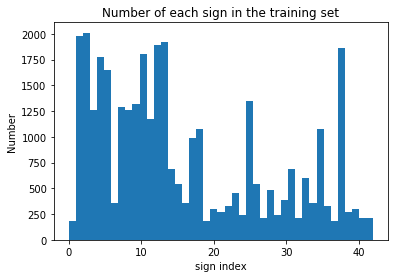

In [14]:
# plot a histogram of the number of examples of each sign
import matplotlib.pyplot as plt

plt.hist(y_train, bins=n_classes)
plt.title('Number of each sign in the training set')
plt.xlabel('sign index')
plt.ylabel('Number')
plt.plot()

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

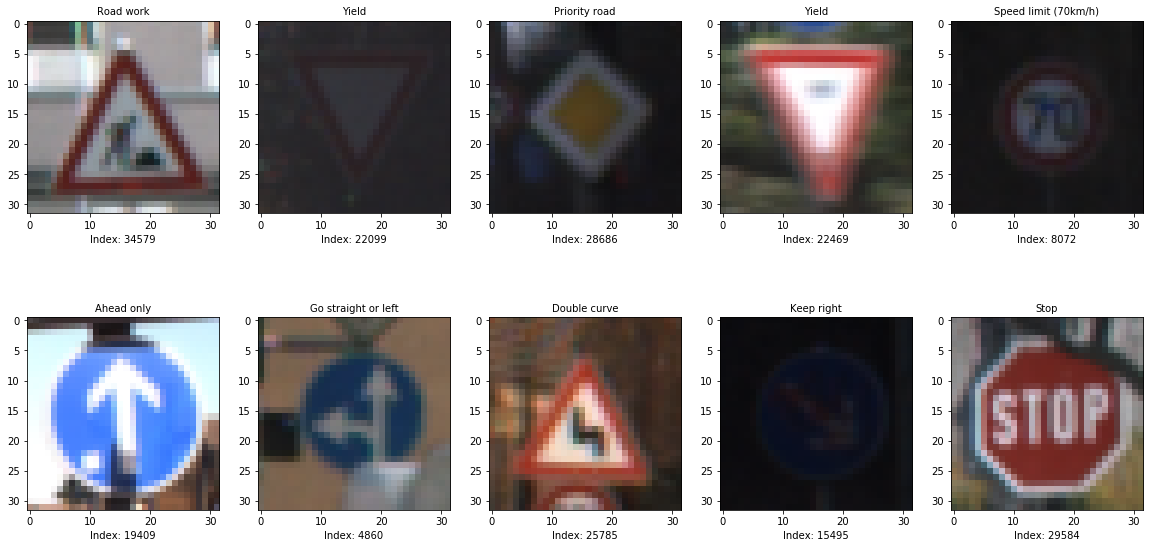

In [15]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import csv    
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.figure(figsize=(20,10))

# export all signnames 
imgTitles = []
with open('signnames.csv','r') as csvfile:
    Titles = csv.DictReader(csvfile, delimiter=',')
    for row in Titles:
        imgTitles.append(row['SignName'])    

# random 10 pictures in training sample
for i in range(0,10,1):
    img = plt.subplot(2,5,i+1)
    Index = np.random.randint(n_train-1)  
    plt.imshow(X_train[Index])
    img.set_title(imgTitles[y_train[Index]],fontsize = 10)
    img.set_xlabel('Index: ' + str(Index))


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

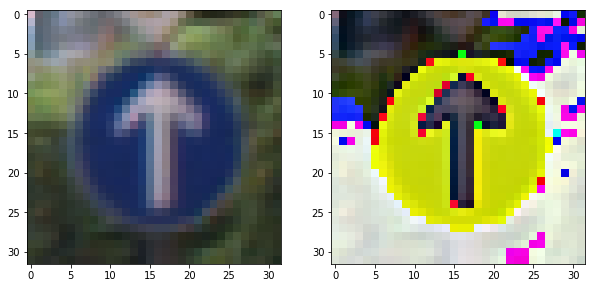

In [16]:
# Shuffle training examples
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train)

X_train_origin = X_train
X_test_origin = X_test

# normalize input
def normalize(X):   
    X = (X - X.mean()) / (np.max(X) - np.min(X))
    return X

X_train = normalize(X_train)
X_test = normalize(X_test)

# compare normalized image with original image
def compare_image(i):
    plt.figure(figsize = (10,10))
    plt.subplot(1,2,1)
    plt.imshow(X_train_origin[i])
    plt.subplot(1,2,2)
    plt.imshow(X_train[i])

compare_image(120)

### Model Architecture

using LeNet-5 as model architecture
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels.C is 3 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x32.filter: 5 stride:1

**Activation.** relu function.

**Pooling.** The output shape should be 14x14x32.

**Dropout.** keep prob: 90%

**Layer 2: Convolutional.** The output shape should be 10x10x64.

**Activation.** relu function.

**Pooling.** The output shape should be 5x5x64.

**Dropout.** keep prob: 90%

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. 

**Layer 3: Fully Connected.** This should have 512 outputs.

**Activation.** relu function.

**Dropout.** keep prob: 90%

**Layer 4: Fully Connected.** This should have 128 outputs.

**Activation.** relu function

**Dropout.** keep prob: 90%

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
mu = 0.0
sigma = 0.1
EPOCHS = 40
BATCH_SIZE = 512
learning_rate = 0.001
dropout = 0.9

# should be better to make a class
def LeNet(X,dropout):
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(X, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation
    conv1 = tf.nn.relu(conv1)

    #pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    
    # dropout
    conv1 = tf.nn.dropout(conv1, dropout)

    # Layer 2: Convolutional Input = 14x14x32. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # dropout
    conv2 = tf.nn.dropout(conv2, dropout)
    
    # Flatten. Input = 5x5x64. Output = 1600.
    fc0   = flatten(conv2)

    # Layer 3: Fully Connected. Input = 1600. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation
    fc1 = tf.nn.relu(fc1)
    
    # dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Layer 4: Fully Connected. Input = 512. Output = 128.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(512, 128), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(128))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation
    fc2 = tf.nn.relu(fc2)
    
    # dropout
    fc2 = tf.nn.dropout(fc2, dropout)
    
    # Layer 5: Fully Connected. Input = 128. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# input and label
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

# train pipeline
logits = LeNet(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset: offset + BATCH_SIZE], y_data[offset: offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {x:batch_x, y:batch_y,keep_prob:1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [19]:
# train the model
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    num_examples = len(X_train)
    accuracy_all = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_train[offset: offset + BATCH_SIZE], y_train[offset: offset + BATCH_SIZE]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y, keep_prob:dropout})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        accuracy_all.append(validation_accuracy)
        print("EPOCHS {} ...".format(i+1))
        print("Validation accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCHS 1 ...
Validation accuracy = 0.662

EPOCHS 2 ...
Validation accuracy = 0.846

EPOCHS 3 ...
Validation accuracy = 0.868

EPOCHS 4 ...
Validation accuracy = 0.912

EPOCHS 5 ...
Validation accuracy = 0.902

EPOCHS 6 ...
Validation accuracy = 0.918

EPOCHS 7 ...
Validation accuracy = 0.926

EPOCHS 8 ...
Validation accuracy = 0.930

EPOCHS 9 ...
Validation accuracy = 0.925

EPOCHS 10 ...
Validation accuracy = 0.916

EPOCHS 11 ...
Validation accuracy = 0.928

EPOCHS 12 ...
Validation accuracy = 0.917

EPOCHS 13 ...
Validation accuracy = 0.925

EPOCHS 14 ...
Validation accuracy = 0.921

EPOCHS 15 ...
Validation accuracy = 0.934

EPOCHS 16 ...
Validation accuracy = 0.933

EPOCHS 17 ...
Validation accuracy = 0.924

EPOCHS 18 ...
Validation accuracy = 0.925

EPOCHS 19 ...
Validation accuracy = 0.917

EPOCHS 20 ...
Validation accuracy = 0.917

EPOCHS 21 ...
Validation accuracy = 0.931

EPOCHS 22 ...
Validation accuracy = 0.937

EPOCHS 23 ...
Validation accuracy = 0.934

EPOCHS 

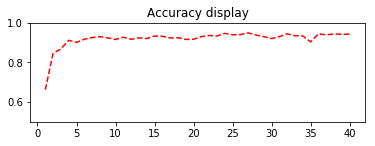

In [20]:
# plot the results
Plot = plt.subplot(212)
Plot.set_title('Accuracy display')
Plot.set_ylim([0.5,1])
epochs_plt = [i + 1 for i in range(EPOCHS)]
plt.plot(epochs_plt, accuracy_all, 'r--')
plt.show()

In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_accuracy = evaluate(X_train, y_train)
    validation_accuracy = evaluate(X_valid, y_valid)
    test_accuracy = evaluate(X_test, y_test)
    print("Accuracy summary")
    print()
    print("Train Accuracy = {:.5f}".format(train_accuracy))
    print("Validation Accuracy = {:.5f}".format(validation_accuracy))
    print("Test Accuracy = {:.5f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy summary

Train Accuracy = 1.00000
Validation Accuracy = 0.94331
Test Accuracy = 0.96033


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

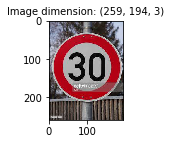

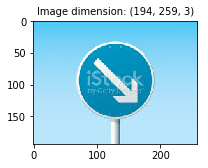

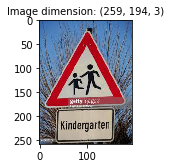

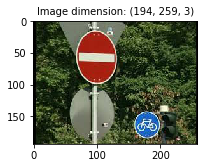

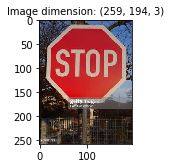

In [33]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

def load_show_image(image_path):
    img = mpimg.imread(image_path)
    return img

img1 = load_show_image('new-image/30.jpeg')
img2 = load_show_image('new-image/keepright.jpeg')
img3 = load_show_image('new-image/kindergarden.jpeg')
img4 = load_show_image('new-image/noentry.jpeg')
img5 = load_show_image('new-image/stop.jpeg')

new_image_origin = [img1, img2, img3, img4, img5]

# plot new image
for i in range(0,5,1):
    img = plt.subplot(2,3,i+1)  
    plt.imshow(new_image_origin[i])
    plt.figure(figsize = (10,5))
    imgtitle = 'Image dimension: ' + str(new_image_origin[i].shape)
    img.set_title(imgtitle,fontsize = 10)

### Predict the Sign Type for Each Image

In [34]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def new_image_preprocess(image):
    image = cv2.resize(image, (32,32), interpolation=cv2.INTER_AREA)
    image = normalize(image)
    return image

# image preprocessing
images = []
for image in new_image_origin:
    image = new_image_preprocess(image)
    images.append(image)

INFO:tensorflow:Restoring parameters from ./lenet
[ 1 38 28 18 12]


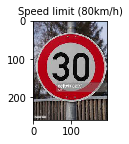

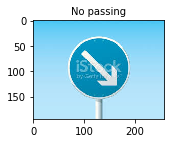

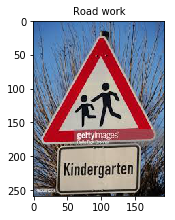

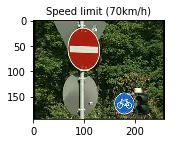

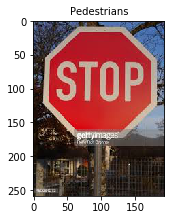

In [35]:
prediction_prob = tf.nn.softmax(logits) 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = sess.run(prediction_prob, feed_dict={x:images, keep_prob:1.})
    prediction_index = sess.run(tf.argmax(prediction,1))
print(prediction_index)

for i in range(0,5,1):
    img = plt.subplot(2,3,i+1)  
    plt.imshow(new_image_origin[i])
    plt.figure(figsize = (8,8))
    img.set_title(imgTitles[y_train[prediction_index[i]]],fontsize = 10)

### Analyze Performance

As figures shown above, the accuracy for new images is 0

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

TopKV2(values=array([[  1.00000000e+00,   1.70765346e-11,   8.74724519e-16,
          1.31916117e-16,   7.79002371e-17],
       [  5.58438897e-01,   4.41561043e-01,   2.97105061e-08,
          5.04534938e-14,   8.27655375e-16],
       [  6.69969797e-01,   3.23692083e-01,   3.20607563e-03,
          2.98004970e-03,   6.98678268e-05],
       [  9.89707589e-01,   4.57033096e-03,   1.94641459e-03,
          1.23556214e-03,   1.20237237e-03],
       [  1.00000000e+00,   3.73568554e-09,   2.27601249e-09,
          2.44205155e-13,   1.87447544e-14]], dtype=float32), indices=array([[ 1,  0, 18, 14,  5],
       [38, 34, 40,  6,  5],
       [28,  0, 29, 23, 11],
       [18, 21, 26, 27, 19],
       [12, 10, 11,  5, 17]], dtype=int32))



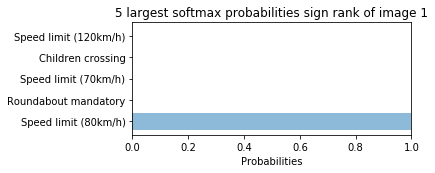

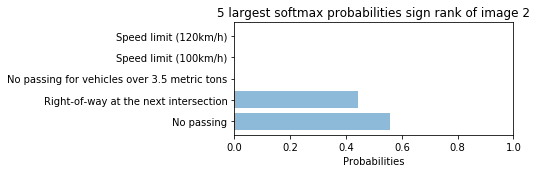

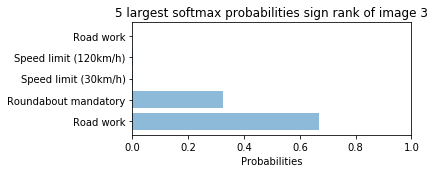

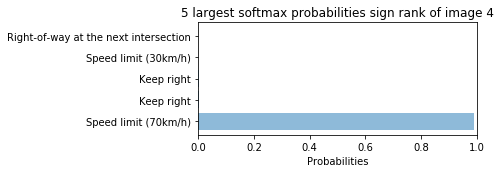

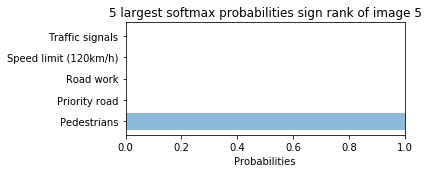

In [72]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

sess = tf.Session()
print(sess.run(tf.nn.top_k(prediction, k=5)))
print()

# use bar graph to demostrate result
for i in range(len(prediction)):

    #print(sess.run(tf.nn.top_k(prediction[i], k=5)))
    a = sess.run(tf.nn.top_k(prediction[i], k=5))
    index = a.indices
    
    #plt.imshow(new_image_origin[i])
    objects = []
    for n in range(0,len(index),1):    
        #print(imgTitles[y_train[index[n]]] + '   index:' + str(index[n]))
        objects.append(imgTitles[y_train[index[n]]]) 
    
    plt.figure(figsize = (5,12))   
    plt.subplot(5,1,i+1)
    plt.barh(np.arange(5), a.values,align='center', alpha=0.5)
    plt.yticks(np.arange(5), objects)
    plt.title('5 largest softmax probabilities sign rank of image ' + str(i+1))
    plt.xlabel('Probabilities')
    plt.xlim([0.0,1.0]) 
    plt.show()